In [329]:
import pandas as pd
import numpy as np
from numpy import cov
import scipy.stats as stats
#import scipy.stats as ttest_ind
import matplotlib.pyplot as plt
import math

In [330]:
GCE = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\GuilfordCounty_emotion_data.csv")
GCE.drop(['Unnamed: 0'], axis=1,inplace=True)


In [331]:
CCE = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\CharlotteCity_emotion_data.csv")
CCE.drop(['Unnamed: 0'], axis=1,inplace=True)
CCE.shape

(17010, 5)

In [332]:
RCE = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\RaleighCity_emotion_data.csv")
RCE.drop(['Unnamed: 0'], axis=1,inplace=True)
RCE.shape

(11410, 5)

In [333]:
DCE = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\DurhamCity_emotion_data.csv")
DCE.drop(['Unnamed: 0'], axis=1,inplace=True)
DCE.shape

(15410, 5)

In [334]:
DCNTE = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\DurhamCounty_emotion_data.csv")
DCNTE.drop(['Unnamed: 0'], axis=1,inplace=True)
DCNTE.shape

(16703, 5)

In [335]:
MCE = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\MecklenburgCounty_emotion_data.csv")
MCE.drop(['Unnamed: 0'], axis=1,inplace=True)
MCE.shape

(15660, 5)

In [336]:
WCE = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\WakeCounty_emotion_data.csv")
WCE.drop(['Unnamed: 0'], axis=1,inplace=True)
WCE.shape

(21389, 5)

In [337]:
GCE.describe()

,page_number,sent_count
count,17338.000000,17338.000000
mean,217.690852,1.635310
std,128.187342,1.654592
min,2.000000,1.000000
25%,122.000000,1.000000
50%,207.000000,1.000000
75%,304.000000,2.000000
max,495.000000,46.000000


In [338]:
CCE.describe()

,page_number,sent_count
count,17010.000000,17010.000000
mean,232.655673,1.601764
std,148.605213,1.607941
min,1.000000,1.000000
25%,104.000000,1.000000
50%,217.000000,1.000000
75%,361.000000,2.000000
max,497.000000,37.000000


In [339]:
RCE.describe()

,page_number,sent_count
count,11410.000000,11410.000000
mean,153.664943,1.917178
std,92.322943,2.450791
min,1.000000,1.000000
25%,78.000000,1.000000
50%,153.000000,1.000000
75%,226.000000,2.000000
max,316.000000,45.000000


In [340]:
DCE.describe()

,page_number,sent_count
count,15410.00000,15410.000000
mean,185.73608,1.623232
std,107.73252,1.486402
min,1.00000,1.000000
25%,94.00000,1.000000
50%,198.00000,1.000000
75%,267.00000,2.000000
max,398.00000,29.000000


In [341]:
DCNTE.describe()

,page_number,sent_count
count,16703.000000,16703.000000
mean,165.013111,1.794348
std,95.378222,2.134286
min,1.000000,1.000000
25%,87.000000,1.000000
50%,166.000000,1.000000
75%,246.000000,2.000000
max,323.000000,43.000000


In [342]:
MCE.describe()

,page_number,sent_count
count,15660.000000,15660.000000
mean,251.428608,1.578480
std,167.133835,1.470847
min,1.000000,1.000000
25%,93.000000,1.000000
50%,235.000000,1.000000
75%,389.000000,2.000000
max,537.000000,29.000000


In [343]:
WCE.describe()

,page_number,sent_count
count,21389.000000,21389.000000
mean,242.817055,1.694563
std,140.378563,1.724524
min,1.000000,1.000000
25%,120.000000,1.000000
50%,241.000000,1.000000
75%,356.000000,2.000000
max,498.000000,44.000000


In [344]:
!pip install spacy

In [345]:
import spacy

In [346]:
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [347]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS


AttributeError: module 'spacy.lang' has no attribute 'en'

In [348]:
print('Number of stop words: %d' % len(spacy_stopwords))

NameError: name 'spacy_stopwords' is not defined

In [ ]:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])


In [ ]:
GCE1 = GCE['word'].to_string()

In [ ]:
filtered_sent=[]

doc = nlp(GCE1)

for word in doc:
    if word.is_stop==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

In [377]:
GCF = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\GCFunds2020.csv")    # General Fund Summary 2019 #
GCF.drop(['Unnamed: 0'], axis=1,inplace=True)

In [378]:
GCF.head(5)

,page_number,word,sent_count,sentiment,category
0,27,Debt,17,Negative,Sentiment
1,27,Debt,17,Sadness,Emotion
2,36,Balance,16,Positive,Sentiment
3,33,Tax,15,Negative,Sentiment
4,33,Tax,15,Sadness,Emotion


In [379]:
GCF1 = GCF.drop(columns=['page_number'])

In [380]:
list1 = GCF1["word"].values

In [381]:
list1

array(['Debt', 'Debt', 'Balance', ..., 'Safe', 'Shelter', 'Structure'],
      dtype=object)

In [382]:
!pip install nltk

In [383]:
import nltk

In [384]:
from nltk.probability import FreqDist
fdist = FreqDist(list1)
print(fdist)

<FreqDist with 296 samples and 2012 outcomes>


In [385]:
fdist.most_common(10)

[('Public', 58),
 ('General', 50),
 ('Pay', 48),
 ('Tax', 46),
 ('Emergency', 44),
 ('Debt', 42),
 ('Medical', 40),
 ('County', 39),
 ('Budget', 36),
 ('Government', 30)]

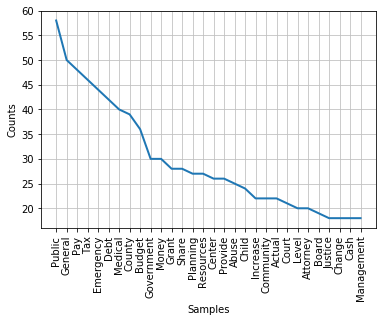

In [386]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)

In [387]:
GCF1.sentiment = GCF1.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [388]:
GCF1.head()

,word,sent_count,sentiment,category
0,Debt,17,0,Sentiment
1,Debt,17,0,Emotion
2,Balance,16,1,Sentiment
3,Tax,15,0,Sentiment
4,Tax,15,0,Emotion


In [389]:
GCF1.describe()

,sent_count
count,2012.000000
mean,1.675447
std,1.596096
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,17.000000


In [390]:
GCF1.sentiment.value_counts()

1    646
2    458
0    322
3    240
5    120
6    115
7     41
8     36
4     34
Name: sentiment, dtype: int64

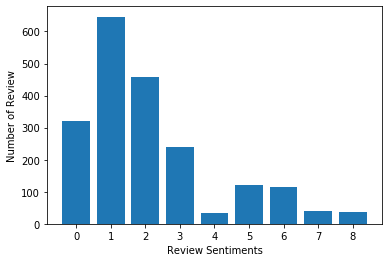

In [391]:
Sentiment_count=GCF1.groupby('sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['word'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [392]:
DCF = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\DurhamCounty_emotion_data.csv")    # General Fund Summary 2019 #
DCF.drop(['Unnamed: 0'], axis=1,inplace=True)

In [393]:
DCF.head()

,page_number,word,sent_count,sentiment,category
0,66,Fee,43,Anger,Emotion
1,66,Fee,43,Negative,Sentiment
2,66,Surcharge,40,Anger,Emotion
3,66,Surcharge,40,Negative,Sentiment
4,66,Technology,36,Positive,Sentiment


In [394]:
DCF1 = DCF.drop(columns=['page_number'])

In [395]:
list2 = DCF1["word"].values

In [396]:
from nltk.probability import FreqDist
fdist1 = FreqDist(list2)
print(fdist1)

<FreqDist with 1158 samples and 16703 outcomes>


In [397]:
fdist1.most_common(10)

[('Youth', 264),
 ('Public', 252),
 ('Income', 252),
 ('County', 240),
 ('Resources', 228),
 ('General', 212),
 ('Provide', 208),
 ('Providing', 208),
 ('Management', 198),
 ('Organization', 185)]

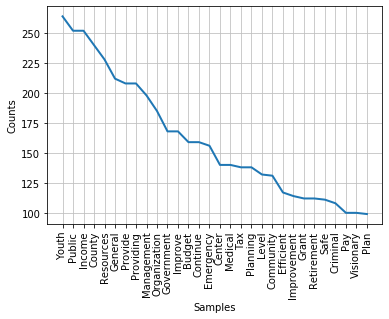

In [398]:
import matplotlib.pyplot as plt
fdist1.plot(30,cumulative=False)

In [399]:
DCF1.sentiment = DCF1.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [400]:
DCF1.head()

,word,sent_count,sentiment,category
0,Fee,43,7,Emotion
1,Fee,43,0,Sentiment
2,Surcharge,40,7,Emotion
3,Surcharge,40,0,Sentiment
4,Technology,36,1,Sentiment


In [401]:
DCF1.sentiment.value_counts()

1    5557
2    3696
0    2203
3    1993
6    1189
5     930
7     480
4     397
8     258
Name: sentiment, dtype: int64

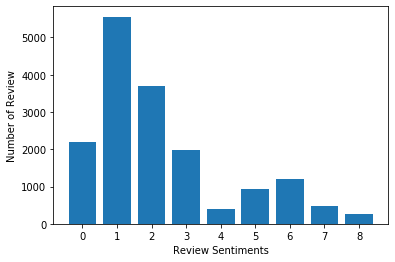

In [402]:
Sentiment_count1=DCF1.groupby('sentiment').count()
plt.bar(Sentiment_count1.index.values, Sentiment_count1['word'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [403]:
# 2008 data #

In [404]:
GCF08 = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\GC2008.csv")    # General Fund Summary 2008 #
GCF08.drop(['Unnamed: 0'], axis=1,inplace=True)

In [405]:
GCF08.head()

,page_number,word,sent_count,sentiment,category
0,19,County,20,Trust,Emotion
1,1,Tax,17,Negative,Sentiment
2,1,Tax,17,Sadness,Emotion
3,7,Debt,17,Negative,Sentiment
4,7,Debt,17,Sadness,Emotion


In [406]:
GCF08 = GCF08.drop(columns=['page_number'])

In [407]:
list3 = GCF08["word"].values

In [408]:
from nltk.probability import FreqDist
fdist2 = FreqDist(list3)
print(fdist2)

<FreqDist with 191 samples and 1266 outcomes>


In [409]:
fdist2.most_common(10)

[('Emergency', 48),
 ('General', 40),
 ('Public', 36),
 ('Court', 36),
 ('Attorney', 36),
 ('Tax', 34),
 ('Planning', 33),
 ('Recreation', 30),
 ('Child', 30),
 ('Resources', 30)]

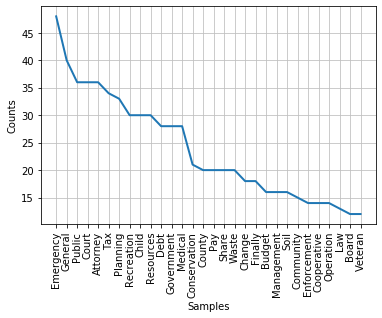

In [410]:
import matplotlib.pyplot as plt
fdist2.plot(30,cumulative=False)

In [411]:
GCF08.sentiment = GCF08.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [412]:
GCF08.sentiment.value_counts()

1    383
2    267
0    218
3    151
5     96
6     71
7     28
8     28
4     24
Name: sentiment, dtype: int64

In [413]:
GCF08.describe()

,sent_count
count,1266.000000
mean,1.932859
std,2.047903
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,20.000000


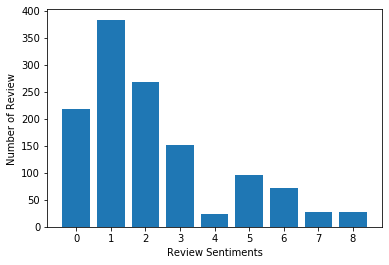

In [414]:
Sentiment_count1=GCF08.groupby('sentiment').count()
plt.bar(Sentiment_count1.index.values, Sentiment_count1['word'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [415]:
DCF08 = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\DC Funds 2008.csv")    # General Fund Summary 2008 #
DCF08.drop(['Unnamed: 0'], axis=1,inplace=True)

In [416]:
DCF08.head()

,page_number,word,sent_count,sentiment,category
0,5,County,19,Trust,Emotion
1,13,County,18,Trust,Emotion
2,30,Tax,18,Negative,Sentiment
3,30,Tax,18,Sadness,Emotion
4,33,Sap,17,Negative,Sentiment


In [417]:
DCF08 = DCF08.drop(columns=['page_number'])

In [418]:
list4 = DCF08["word"].values

In [419]:
from nltk.probability import FreqDist
fdist3 = FreqDist(list4)
print(fdist3)

<FreqDist with 560 samples and 3021 outcomes>


In [420]:
fdist3.most_common(10)

[('Improve', 88),
 ('Continue', 54),
 ('Center', 52),
 ('Provide', 50),
 ('Management', 46),
 ('Public', 46),
 ('Efficient', 42),
 ('Income', 42),
 ('General', 40),
 ('Providing', 40)]

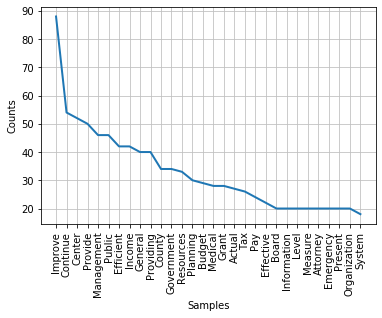

In [421]:
import matplotlib.pyplot as plt
fdist3.plot(30,cumulative=False)

In [422]:
DCF08.sentiment = DCF08.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [423]:
DCF08.sentiment.value_counts()

1    999
2    737
3    377
0    372
6    205
5    144
7     82
4     65
8     40
Name: sentiment, dtype: int64

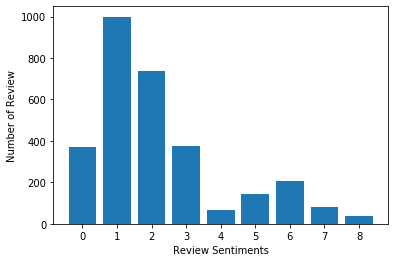

In [424]:
Sentiment_count3=DCF08.groupby('sentiment').count()
plt.bar(Sentiment_count3.index.values, Sentiment_count3['word'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [433]:
a1 = np.random.choice(a=DCF08.sentiment,size=300)
#print(a1)
b1 = np.random.choice(a=DCF1.sentiment,size=300)
#print(b1)
cov_mat = np.stack((a1, b1), axis = 0)
#print(cov_mat)
#print('Correlation of X and Y: %.2f'%np.corrcoef(cov_mat)[0, 1])
#print(np.cov(cov_mat)[0,1])
#print('Covariance of X and Y: %.2f'%np.cov(cov_mat)[0, 1])

In [426]:
Sentiment_count1.head()

,word,sent_count,category
sentiment,,,
0,218,218,218
1,383,383,383
2,267,267,267
3,151,151,151
4,24,24,24


In [427]:
Sentiment_count3.sent_count

sentiment
0    372
1    999
2    737
3    377
4     65
5    144
6    205
7     82
8     40
Name: sent_count, dtype: int64

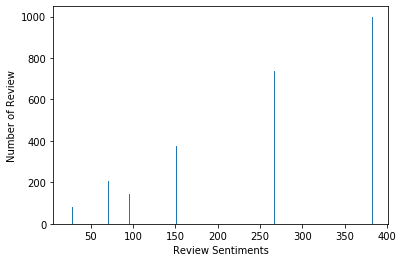

In [428]:
plt.bar(Sentiment_count1.sent_count, Sentiment_count3.sent_count)
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [429]:
DCF08['Year'] = 2008
DCF08.head()

,word,sent_count,sentiment,category,Year
0,County,19,2,Emotion,2008
1,County,18,2,Emotion,2008
2,Tax,18,0,Sentiment,2008
3,Tax,18,0,Emotion,2008
4,Sap,17,0,Sentiment,2008


In [430]:
DCF1['Year'] = 2019
DCF1.head()

,word,sent_count,sentiment,category,Year
0,Fee,43,7,Emotion,2019
1,Fee,43,0,Sentiment,2019
2,Surcharge,40,7,Emotion,2019
3,Surcharge,40,0,Sentiment,2019
4,Technology,36,1,Sentiment,2019


In [431]:
CombinedDF = pd.concat([DCF08,DCF1]) 
CombinedDF.head()

,word,sent_count,sentiment,category,Year
0,County,19,2,Emotion,2008
1,County,18,2,Emotion,2008
2,Tax,18,0,Sentiment,2008
3,Tax,18,0,Emotion,2008
4,Sap,17,0,Sentiment,2008


In [432]:
#CombinedDF = CombinedDF.groupby(["Year","sentiment"])


In [160]:
CombinedDF.first()

word  sent_count   category
Year sentiment                                   
2008 0                 Tax          18  Sentiment
     1             Balance          15  Sentiment
     2              County          19    Emotion
     3               Board          14    Emotion
     4                Vote           8    Emotion
     5               Court          11    Emotion
     6                Vote           8    Emotion
     7               Court          11    Emotion
     8                Pest           5    Emotion
2019 0                 Fee          43  Sentiment
     1          Technology          36  Sentiment
     2              Budget          30    Emotion
     3                Plan          24    Emotion
     4           Emergency          12    Emotion
     5                Fire          18    Emotion
     6               Child          18    Emotion
     7                 Fee          43    Emotion
     8            Criminal          12    Emotion

In [320]:
#stats.ttest_ind(a["sentiment"],b["sentiment"],equal_var=True) 

19724
sentiment          0          1          2          3         4         5  \
Year                                                                        
2008       12.313803  33.068520  24.395895  12.479311  2.151605  4.766634   
2019       13.189247  33.269473  22.127761  11.931988  2.376819  5.567862   

sentiment         6         7         8  
Year                                     
2008       6.785833  2.714333  1.324065  
2019       7.118482  2.873735  1.544633  


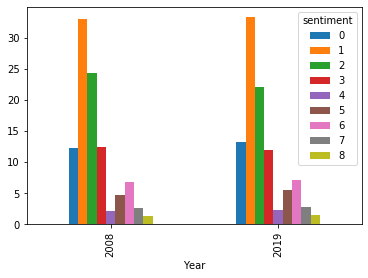

In [321]:
len_DF = len(CombinedDF)
print(len_DF)
#budget_sentiment = CombinedDF.groupby(['Year', 'sentiment']).sentiment.count()
#budget_sentiment.plot(kind='bar')
#print(budget_sentiment)
abc = budget_sentiment.groupby(level=0).apply(lambda x:x*100/x.sum()).unstack()
print(abc)
abc.plot(kind='bar')

In [322]:
GCF08.sentiment.value_counts()

1    383
2    267
0    218
3    151
5     96
6     71
7     28
8     28
4     24
Name: sentiment, dtype: int64

In [323]:
#GCF08_Negative = CombinedDF[CombinedDF.Year=='2008']
GCF08_Negative = CombinedDF[CombinedDF.Year == 2008]
GCF08_Negative.sample = np.random.choice(a=GCF08_Negative.sentiment,size=300)

In [324]:
GCF1_Negative = CombinedDF[CombinedDF.Year==2019]
GCF08_Negative.sample = np.random.choice(a=GCF08_Negative.sentiment,size=300)

In [325]:
#stats.ttest_ind(GCF1_Negative.sample,GCF08_Negative.sample,equal_var=False)

In [352]:
CCF08 = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\CharlotteCityFunds2008.csv")    # General Fund Summary 2019 #
CCF08.drop(['Unnamed: 0'], axis=1,inplace=True)

In [353]:
CCF20 = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\CharlotteCityFunds2019.csv")    # General Fund Summary 2019 #
CCF20.drop(['Unnamed: 0'], axis=1,inplace=True)

In [354]:
CCF08 = CCF08.drop(columns=['page_number'])

In [355]:
CCF19 = CCF20.drop(columns=['page_number'])

In [356]:
CCF08.sentiment = CCF08.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [360]:
CCF19.sentiment = CCF19.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [366]:
DCF08.sentiment.value_counts()

1    999
2    737
3    377
0    372
6    205
5    144
7     82
4     65
8     40
Name: sentiment, dtype: int64

In [367]:
CCF19.sentiment.value_counts()

1    2023
2    1419
3     656
0     463
6     312
5     270
7      78
4      53
8      29
Name: sentiment, dtype: int64

In [368]:
CCF08['Year'] = 2008
CCF08.head()

,word,sent_count,sentiment,category,Year
0,Tax,19,0,Sentiment,2008
1,Tax,19,0,Emotion,2008
2,Grant,17,3,Emotion,2008
3,Grant,17,6,Emotion,2008
4,Grant,17,1,Sentiment,2008


In [369]:
CCF19['Year'] = 2019
CCF19.head()

,word,sent_count,sentiment,category,Year
0,Fire,24,5,Emotion,2019
1,Police,14,5,Emotion,2019
2,Police,14,1,Sentiment,2019
3,Police,14,2,Emotion,2019
4,Measure,14,2,Emotion,2019


In [370]:
CombinedCCF = pd.concat([CCF08,CCF19]) 
CombinedCCF.head()

,word,sent_count,sentiment,category,Year
0,Tax,19,0,Sentiment,2008
1,Tax,19,0,Emotion,2008
2,Grant,17,3,Emotion,2008
3,Grant,17,6,Emotion,2008
4,Grant,17,1,Sentiment,2008


6221
sentiment          0          1          2          3         4         5  \
Year                                                                        
2008       16.993464  28.540305  21.241830  10.130719  3.594771  7.625272   
2019        8.730907  38.148218  26.758439  12.370356  0.999434  5.091458   

sentiment         6         7         8  
Year                                     
2008       4.793028  4.793028  2.287582  
2019       5.883462  1.470866  0.546860  


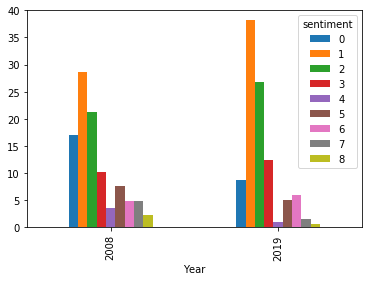

In [440]:
len_DF = len(CombinedCCF)
print(len_DF)
budget_sentiment = CombinedCCF.groupby(['Year', 'sentiment']).sentiment.count()
#budget_sentiment.plot(kind='bar')
#print(budget_sentiment)
abc = budget_sentiment.groupby(level=0).apply(lambda x:x*100/x.sum()).unstack()
print(abc)
abc.plot(kind='bar')

In [434]:
GCF1['Year'] = 2020
GCF1.head()

,word,sent_count,sentiment,category,Year
0,Debt,17,0,Sentiment,2020
1,Debt,17,0,Emotion,2020
2,Balance,16,1,Sentiment,2020
3,Tax,15,0,Sentiment,2020
4,Tax,15,0,Emotion,2020


In [435]:
GCF08['Year'] = 2008
GCF08.head()

,word,sent_count,sentiment,category,Year
0,County,20,2,Emotion,2008
1,Tax,17,0,Sentiment,2008
2,Tax,17,0,Emotion,2008
3,Debt,17,0,Sentiment,2008
4,Debt,17,0,Emotion,2008


In [437]:
CombinedGCF = pd.concat([GCF08,GCF1]) 
CombinedGCF.head()

,word,sent_count,sentiment,category,Year
0,County,20,2,Emotion,2008
1,Tax,17,0,Sentiment,2008
2,Tax,17,0,Emotion,2008
3,Debt,17,0,Sentiment,2008
4,Debt,17,0,Emotion,2008


3278
sentiment          0          1          2          3         4         5  \
Year                                                                        
2008       17.219589  30.252765  21.090047  11.927330  1.895735  7.582938   
2020       16.003976  32.107356  22.763419  11.928429  1.689861  5.964215   

sentiment         6         7         8  
Year                                     
2008       5.608215  2.211690  2.211690  
2020       5.715706  2.037773  1.789264  


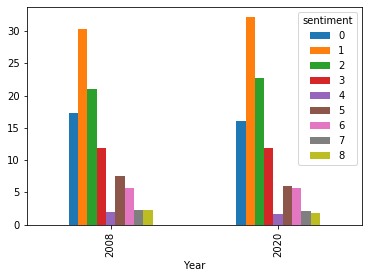

In [439]:
len_DF = len(CombinedGCF)
print(len_DF)
budget_sentiment = CombinedGCF.groupby(['Year', 'sentiment']).sentiment.count()
#budget_sentiment.plot(kind='bar')
#print(budget_sentiment)
abc = budget_sentiment.groupby(level=0).apply(lambda x:x*100/x.sum()).unstack()
print(abc)
abc.plot(kind='bar')